In [1]:
#Importing the libraries

import os
import numpy as np
import pandas as pd
import cv2 as cv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import random 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
path_train ="C:/python_lessons/January_Project/split_images/train/"
path_test = "C:/python_lessons/January_Project/split_images/val/"

Categories=["images_elliptical","images_spiral_arms","images_spiral_edge","images_spiral_noarms"]

In [163]:
train_data = []
def create_data():
    for categories in Categories:
        path = os.path.join(path_train , categories)
        class_name = categories
        for img in random.sample(os.listdir(path),300):
            try:
                img_array = cv.imread(os.path.join(path,img))
                new_array = cv.resize(img_array , (50,50))
                train_data.append([new_array , class_name])
            except Exception as e:
                pass
create_data()

In [164]:
random.shuffle(train_data)

In [165]:
x_train = []
y_train = []
for features,labels in train_data:
    x_train.append(features)
    y_train.append(labels)

In [166]:
df = pd.DataFrame(y_train,columns=["labels"])

In [167]:
df

,labels
0,images_spiral_edge
1,images_spiral_edge
2,images_spiral_noarms
3,images_spiral_arms
4,images_spiral_edge
...,...
1195,images_elliptical
1196,images_spiral_arms
1197,images_spiral_noarms
1198,images_spiral_noarms


C:\Users\HelenLuhaar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


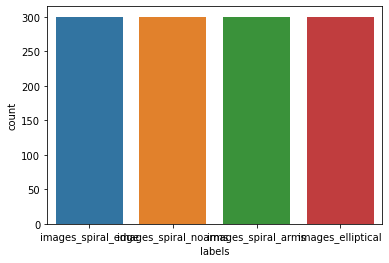

In [168]:
sns.countplot(df['labels']);

In [169]:
#Putting features into an array

x_train = np.array(x_train)

In [170]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

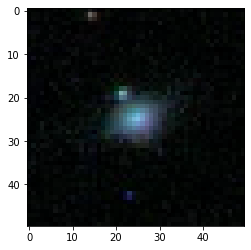

In [174]:
plt.imshow(x_train[55])

In [176]:
test_data = []
def create_data():
    for categories in Categories:
        path = os.path.join(path_test , categories)
        class_name = categories
        for img in random.sample(os.listdir(path),75):
            try:
                img_array = cv.imread(os.path.join(path,img))
                new_array = cv.resize(img_array , (50,50))
                test_data.append([new_array , class_name])
            except Exception as e:
                pass
create_data()

In [177]:
random.shuffle(test_data)

In [178]:
x_test = []
y_test = []
for features,labels in test_data:
    x_test.append(features)
    y_test.append(labels)

In [179]:
x_test = np.array(x_test)

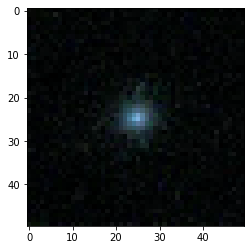

In [180]:
plt.imshow(x_test[3])

In [181]:
le = LabelEncoder()
y_test = le.fit_transform(y_test)

In [182]:
x_train.shape

(1200, 50, 50, 3)

In [183]:
x_test.shape

(300, 50, 50, 3)

In [185]:
cnn = Sequential()
cnn.add(Conv2D(64,(3,3),activation="relu",input_shape=(50,50,3)))
cnn.add(MaxPool2D(2,2))
cnn.add(Conv2D(128,(5,5),activation="relu"))
cnn.add(MaxPool2D(2,2))
cnn.add(Flatten())
cnn.add(Dense(212,activation="relu"))
cnn.add(Dense(4,activation="softmax"))

In [186]:
cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [193]:
history_cnn = cnn.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20)

Epoch 1/20
38/38 [==============================] - 6s 147ms/step - loss: 0.2942 - accuracy: 0.8867 - val_loss: 3.9067 - val_accuracy: 0.3067
Epoch 2/20
38/38 [==============================] - 8s 208ms/step - loss: 0.2275 - accuracy: 0.9208 - val_loss: 4.2695 - val_accuracy: 0.2900
Epoch 3/20
38/38 [==============================] - 8s 204ms/step - loss: 0.1661 - accuracy: 0.9483 - val_loss: 4.9349 - val_accuracy: 0.3333
Epoch 4/20
38/38 [==============================] - 8s 200ms/step - loss: 0.1297 - accuracy: 0.9592 - val_loss: 5.1279 - val_accuracy: 0.3067
Epoch 5/20
38/38 [==============================] - 8s 200ms/step - loss: 0.1418 - accuracy: 0.9625 - val_loss: 5.1478 - val_accuracy: 0.3067
Epoch 6/20
38/38 [==============================] - 8s 206ms/step - loss: 0.1856 - accuracy: 0.9433 - val_loss: 4.8697 - val_accuracy: 0.3100
Epoch 7/20
38/38 [==============================] - 8s 200ms/step - loss: 0.1941 - accuracy: 0.9417 - val_loss: 5.9734 - val_accuracy: 0.3067
Epoch 

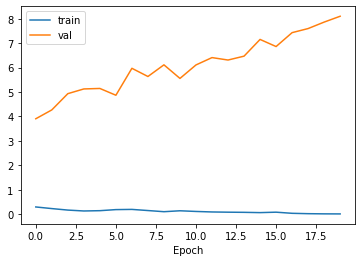

In [194]:
plt.plot(history_cnn.history["loss"])
plt.plot(history_cnn.history["val_loss"])
plt.xlabel('Epoch')
#plt.ylabel('*100%')
plt.legend(["train","val"]);

In [195]:
y_pred = cnn.predict(x_test)

10/10 [==============================] - 0s 31ms/step


<AxesSubplot:>

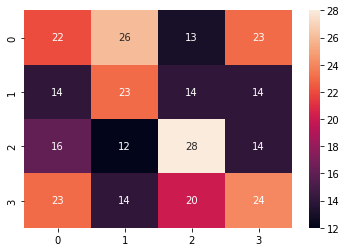

In [196]:
sns.heatmap(confusion_matrix(y_pred.argmax(axis=1),y_test),annot=True)

In [197]:
confusion_matrix(y_pred.argmax(axis=1),y_test)

array([[22, 26, 13, 23],
       [14, 23, 14, 14],
       [16, 12, 28, 14],
       [23, 14, 20, 24]], dtype=int64)

In [198]:
accuracy_score(y_pred.argmax(axis=1),y_test)

0.3233333333333333